This is an expansion of Robin's notebook ( https://www.kaggle.com/robinkraft/making-tifs-look-normal-using-spectral/ ) to show ways how to use the spectral module to read bands, calculate the NDVI, NDWI and save the image as a high-quality jpeg.

In [1]:
!ls ../input/train-tif-v2/ | head

train_0.tif
train_1.tif
train_10.tif
train_100.tif
train_1000.tif
train_10000.tif
train_10001.tif
train_10002.tif
train_10003.tif
train_10004.tif
ls: write error: Broken pipe


In [2]:
import os

import numpy as np
from spectral import *
from skimage import io
from sklearn.preprocessing import MinMaxScaler
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
BASEPATH = os.path.abspath('../input/train-tif-v2/')

In [4]:
path = os.path.join(BASEPATH, 'train_10.tif')
img = io.imread(path)
img2 = get_rgb(img, [2, 1, 0]) # RGB
img3 = get_rgb(img, [3, 2, 1]) # NIR-R-G
img4 = get_rgb(img, [3, 2, 0]) # NIR-R-B

# rescaling to 0-255 range - uint8 for display
rescaleIMG = np.reshape(img2, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 255))
rescaleIMG = scaler.fit_transform(rescaleIMG) # .astype(np.float32)
img2_scaled = (np.reshape(rescaleIMG, img2.shape)).astype(np.uint8)

rescaleIMG = np.reshape(img3, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 255))
rescaleIMG = scaler.fit_transform(rescaleIMG) # .astype(np.float32)
img3_scaled = (np.reshape(rescaleIMG, img3.shape)).astype(np.uint8)

rescaleIMG = np.reshape(img4, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 255))
rescaleIMG = scaler.fit_transform(rescaleIMG) # .astype(np.float32)
img4_scaled = (np.reshape(rescaleIMG, img4.shape)).astype(np.uint8)

# spectral module ndvi function
vi = ndvi(img, 2, 3)

# calculate NDVI and NDWI with spectral module adjusted bands
np.seterr(all='warn') # divide by zero, NaN values
vi2 = (img3[:, :, 0] - img3[:, :, 1]) / (img3[:, :, 0] + img3[:, :, 1]) # (NIR - RED) / (NIR + RED)
vi3 = (img3[:, :, 2] - img3[:, :, 0]) / (img3[:, :, 2] + img3[:, :, 0]) # (GREEN - NIR) / (GREEN + NIR)

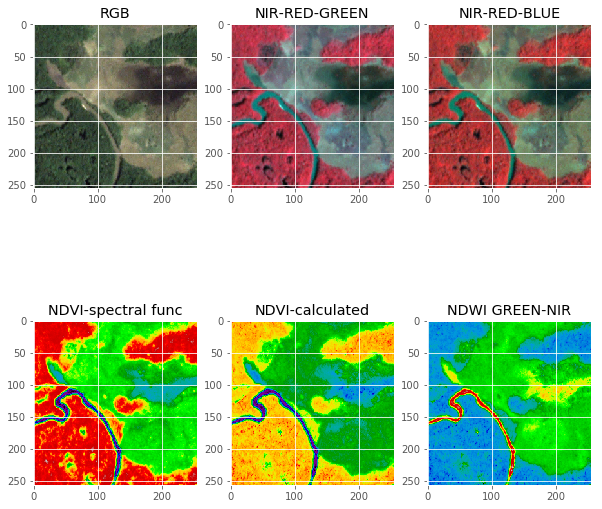

In [5]:
plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))
ax = axes.ravel()
ax[0] = plt.subplot(2, 3, 1, adjustable='box-forced')
ax[1] = plt.subplot(2, 3, 2, sharex=ax[0], sharey=ax[0], adjustable='box-forced')
ax[2] = plt.subplot(2, 3, 3, sharex=ax[0], sharey=ax[0], adjustable='box-forced')
ax[3] = plt.subplot(2, 3, 4, adjustable='box-forced')
ax[4] = plt.subplot(2, 3, 5, adjustable='box-forced')
ax[5] = plt.subplot(2, 3, 6, adjustable='box-forced')
ax[0].imshow(img2_scaled)  # , cmap=plt.cm.gray)
ax[0].set_title('RGB')
# ax[0].axis('off')
ax[1].imshow(img3_scaled)  # , cmap=plt.cm.gray)
ax[1].set_title('NIR-RED-GREEN')
# ax[1].axis('off')
ax[2].imshow(img4_scaled)  # , cmap=plt.cm.gray)
ax[2].set_title('NIR-RED-BLUE')

# alternative cmaps e.g. nipy_spectral, gist_earth, terrain
ax[3].imshow(vi, cmap=plt.get_cmap('nipy_spectral')) 
ax[3].set_title('NDVI-spectral func')
# ax[2].axis('off')
ax[4].imshow(vi2, cmap=plt.get_cmap('nipy_spectral'))  # , cmap=plt.cm.gray)
ax[4].set_title('NDVI-calculated')
# ax[3].axis('off')
ax[5].imshow(vi3, cmap=plt.get_cmap('nipy_spectral'))  # , cmap=plt.cm.gray)
ax[5].set_title('NDWI GREEN-NIR')
plt.show()

In [6]:
# note: save spectral module adjusted array as jpeg
path_jpg = path.replace('tif','jpg')
im = Image.fromarray(img2_scaled)
im.save('train_10.jpg', 'JPEG', quality=95)